In [1]:
import math
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Geting the data**

In [8]:
from google.colab import files
uploaded = files.upload() 

Saving airline_passenger_satisfaction.csv to airline_passenger_satisfaction.csv


In [9]:
import io
data = pd.read_csv(io.BytesIO(uploaded['airline_passenger_satisfaction.csv']))
# Dataset is now stored in a Pandas Dataframe

In [10]:
# Lets take a look at the data
pd.set_option('display.max_columns', None)
data.head()

Unnamed: 0  Gender      customer_type  age   type_of_travel customer_class  \
0           0    Male     Loyal Customer   13  Personal Travel       Eco Plus   
1           1    Male  disloyal Customer   25  Business travel       Business   
2           2  Female     Loyal Customer   26  Business travel       Business   
3           3  Female     Loyal Customer   25  Business travel       Business   
4           4    Male     Loyal Customer   61  Business travel       Business   

   flight_distance  inflight_wifi_service  departure_arrival_time_convenient  \
0              460                      3                                  4   
1              235                      3                                  2   
2             1142                      2                                  2   
3              562                      2                                  5   
4              214                      3                                  3   

   ease_of_online_booking  gate_location  food_and_drink  online_boarding  \
0                       3              1               5                3   
1                       3              3               1                3   
2                       2              2               5                5   
3                       5              5               2                2   
4                       3              3               4                5   

   seat_comfort  inflight_entertainment  onboard_service  leg_room_service  \
0             5                       5                4                 3   
1             1                       1                1                 5   
2             5                       5                4                 3   
3             2                       2                2                 5   
4             5                       3                3                 4   

   baggage_handling  checkin_service  inflight_service  cleanliness  \
0                 4                4                 5            5   
1                 3                1                 4            1   
2                 4                4                 4            5   
3                 3                1                 4            2   
4                 4                3                 3            3   

   departure_delay_in_minutes  arrival_delay_in_minutes  \
0                          25                      18.0   
1                           1                       6.0   
2                           0                       0.0   
3                          11                       9.0   
4                           0                       0.0   

              satisfaction  
0  neutral or dissatisfied  
1  neutral or dissatisfied  
2                satisfied  
3  neutral or dissatisfied  
4                satisfied

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   customer_class                     129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [12]:
data.describe()

Unnamed: 0            age  flight_distance  inflight_wifi_service  \
count  129880.000000  129880.000000    129880.000000          129880.000000   
mean    64939.500000      39.427957      1190.316392               2.728696   
std     37493.270818      15.119360       997.452477               1.329340   
min         0.000000       7.000000        31.000000               0.000000   
25%     32469.750000      27.000000       414.000000               2.000000   
50%     64939.500000      40.000000       844.000000               3.000000   
75%     97409.250000      51.000000      1744.000000               4.000000   
max    129879.000000      85.000000      4983.000000               5.000000   

       departure_arrival_time_convenient  ease_of_online_booking  \
count                      129880.000000           129880.000000   
mean                            3.057599                2.756876   
std                             1.526741                1.401740   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       gate_location  food_and_drink  online_boarding   seat_comfort  \
count  129880.000000   129880.000000    129880.000000  129880.000000   
mean        2.976925        3.204774         3.252633       3.441361   
std         1.278520        1.329933         1.350719       1.319289   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       inflight_entertainment  onboard_service  leg_room_service  \
count           129880.000000    129880.000000     129880.000000   
mean                 3.358077         3.383023          3.350878   
std                  1.334049         1.287099          1.316252   
min                  0.000000         0.000000          0.000000   
25%                  2.000000         2.000000          2.000000   
50%                  4.000000         4.000000          4.000000   
75%                  4.000000         4.000000          4.000000   
max                  5.000000         5.000000          5.000000   

       baggage_handling  checkin_service  inflight_service    cleanliness  \
count     129880.000000    129880.000000     129880.000000  129880.000000   
mean           3.632114         3.306267          3.642193       3.286326   
std            1.180025         1.266185          1.176669       1.313682   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       departure_delay_in_minutes  arrival_delay_in_minutes  
count               129880.000000             129487.000000  
mean                    14.713713                 15.091129  
std                     38.071126                 38.465650  
min                      0.000000                  0.000000  
25%                      0.000000                  0.000000  
50%                      0.000000                  0.000000  
75%                     12.000000                 13.000000  
max                   1592.000000               1584.000000

We see that we have 24 columns, some are categorical (e.g. gender and satisfaction), some are integer (e.g. age, flight distance), one is float (arrival delay in minutes). Many columns contain discrete values between 0-5 which were probably collected using customer satisfaction surveys.

In [13]:
# Lets take a better look at categorical variables
cat_columns = data.select_dtypes(include = ['object'])
unique_values = cat_columns.nunique(dropna=False)
print (unique_values)

Gender            2
customer_type     2
type_of_travel    2
customer_class    3
satisfaction      2
dtype: int64


We can see that we have 5 categorical columns, most of them with only 2 possible values (this includes the target variable 'Satisfaction'). The last one (customer class) has 3 categorical values.

**Hotkey encoding**

We will use hotkey encoding to deal with the categorical variables:

In [14]:
data = pd.get_dummies(data, drop_first = True)
print("The data shape is : {} ".format(data.shape))
data.head()


The data shape is : (129880, 25) 


Unnamed: 0  age  flight_distance  inflight_wifi_service  \
0           0   13              460                      3   
1           1   25              235                      3   
2           2   26             1142                      2   
3           3   25              562                      2   
4           4   61              214                      3   

   departure_arrival_time_convenient  ease_of_online_booking  gate_location  \
0                                  4                       3              1   
1                                  2                       3              3   
2                                  2                       2              2   
3                                  5                       5              5   
4                                  3                       3              3   

   food_and_drink  online_boarding  seat_comfort  inflight_entertainment  \
0               5                3             5                       5   
1               1                3             1                       1   
2               5                5             5                       5   
3               2                2             2                       2   
4               4                5             5                       3   

   onboard_service  leg_room_service  baggage_handling  checkin_service  \
0                4                 3                 4                4   
1                1                 5                 3                1   
2                4                 3                 4                4   
3                2                 5                 3                1   
4                3                 4                 4                3   

   inflight_service  cleanliness  departure_delay_in_minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   arrival_delay_in_minutes  Gender_Male  customer_type_disloyal Customer  \
0                      18.0            1                                0   
1                       6.0            1                                1   
2                       0.0            0                                0   
3                       9.0            0                                0   
4                       0.0            1                                0   

   type_of_travel_Personal Travel  customer_class_Eco  \
0                               1                   0   
1                               0                   0   
2                               0                   0   
3                               0                   0   
4                               0                   0   

   customer_class_Eco Plus  satisfaction_satisfied  
0                        1                       0  
1                        0                       0  
2                        0                       1  
3                        0                       0  
4                        0                       1

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   age                                129880 non-null  int64  
 2   flight_distance                    129880 non-null  int64  
 3   inflight_wifi_service              129880 non-null  int64  
 4   departure_arrival_time_convenient  129880 non-null  int64  
 5   ease_of_online_booking             129880 non-null  int64  
 6   gate_location                      129880 non-null  int64  
 7   food_and_drink                     129880 non-null  int64  
 8   online_boarding                    129880 non-null  int64  
 9   seat_comfort                       129880 non-null  int64  
 10  inflight_entertainment             129880 non-null  int64  
 11  onboard_service                    1298

In [16]:
data.describe()

Unnamed: 0            age  flight_distance  inflight_wifi_service  \
count  129880.000000  129880.000000    129880.000000          129880.000000   
mean    64939.500000      39.427957      1190.316392               2.728696   
std     37493.270818      15.119360       997.452477               1.329340   
min         0.000000       7.000000        31.000000               0.000000   
25%     32469.750000      27.000000       414.000000               2.000000   
50%     64939.500000      40.000000       844.000000               3.000000   
75%     97409.250000      51.000000      1744.000000               4.000000   
max    129879.000000      85.000000      4983.000000               5.000000   

       departure_arrival_time_convenient  ease_of_online_booking  \
count                      129880.000000           129880.000000   
mean                            3.057599                2.756876   
std                             1.526741                1.401740   
min                             0.000000                0.000000   
25%                             2.000000                2.000000   
50%                             3.000000                3.000000   
75%                             4.000000                4.000000   
max                             5.000000                5.000000   

       gate_location  food_and_drink  online_boarding   seat_comfort  \
count  129880.000000   129880.000000    129880.000000  129880.000000   
mean        2.976925        3.204774         3.252633       3.441361   
std         1.278520        1.329933         1.350719       1.319289   
min         0.000000        0.000000         0.000000       0.000000   
25%         2.000000        2.000000         2.000000       2.000000   
50%         3.000000        3.000000         3.000000       4.000000   
75%         4.000000        4.000000         4.000000       5.000000   
max         5.000000        5.000000         5.000000       5.000000   

       inflight_entertainment  onboard_service  leg_room_service  \
count           129880.000000    129880.000000     129880.000000   
mean                 3.358077         3.383023          3.350878   
std                  1.334049         1.287099          1.316252   
min                  0.000000         0.000000          0.000000   
25%                  2.000000         2.000000          2.000000   
50%                  4.000000         4.000000          4.000000   
75%                  4.000000         4.000000          4.000000   
max                  5.000000         5.000000          5.000000   

       baggage_handling  checkin_service  inflight_service    cleanliness  \
count     129880.000000    129880.000000     129880.000000  129880.000000   
mean           3.632114         3.306267          3.642193       3.286326   
std            1.180025         1.266185          1.176669       1.313682   
min            1.000000         0.000000          0.000000       0.000000   
25%            3.000000         3.000000          3.000000       2.000000   
50%            4.000000         3.000000          4.000000       3.000000   
75%            5.000000         4.000000          5.000000       4.000000   
max            5.000000         5.000000          5.000000       5.000000   

       departure_delay_in_minutes  arrival_delay_in_minutes    Gender_Male  \
count               129880.000000             129487.000000  129880.000000   
mean                    14.713713                 15.091129       0.492616   
std                     38.071126                 38.465650       0.499947   
min                      0.000000                  0.000000       0.000000   
25%                      0.000000                  0.000000       0.000000   
50%                      0.000000                  0.000000       0.000000   
75%                     12.000000                 13.000000       1.000000   
max                   1592.000000               1584.000000       1.000000   

       customer_type_dislo

After encoding all of the data is now in numeric form and we have added one column (from the "customer_class" column which was split into two by our dummy variables). Additionally, we can see for the first time statistics for the categorical data. For example: 49.2% of passengers are male (so 50.8% are female), 82% are loyal and 18% disloyal, 31% travel for personal reasons and 69% for business, the split between classes is 44.8% Economy, 7.2% Economy plus and the rest (48%) is business, and most importantly, 43% are satisfied and so 57% are unsatisfied. This shows that our data is quite balanced and it does not require any special treatment/resampling.

**Pairplot**

We will see feature correlation and relationship with our target variable. To save time we will only run the initial analysis on about 10% of the data:

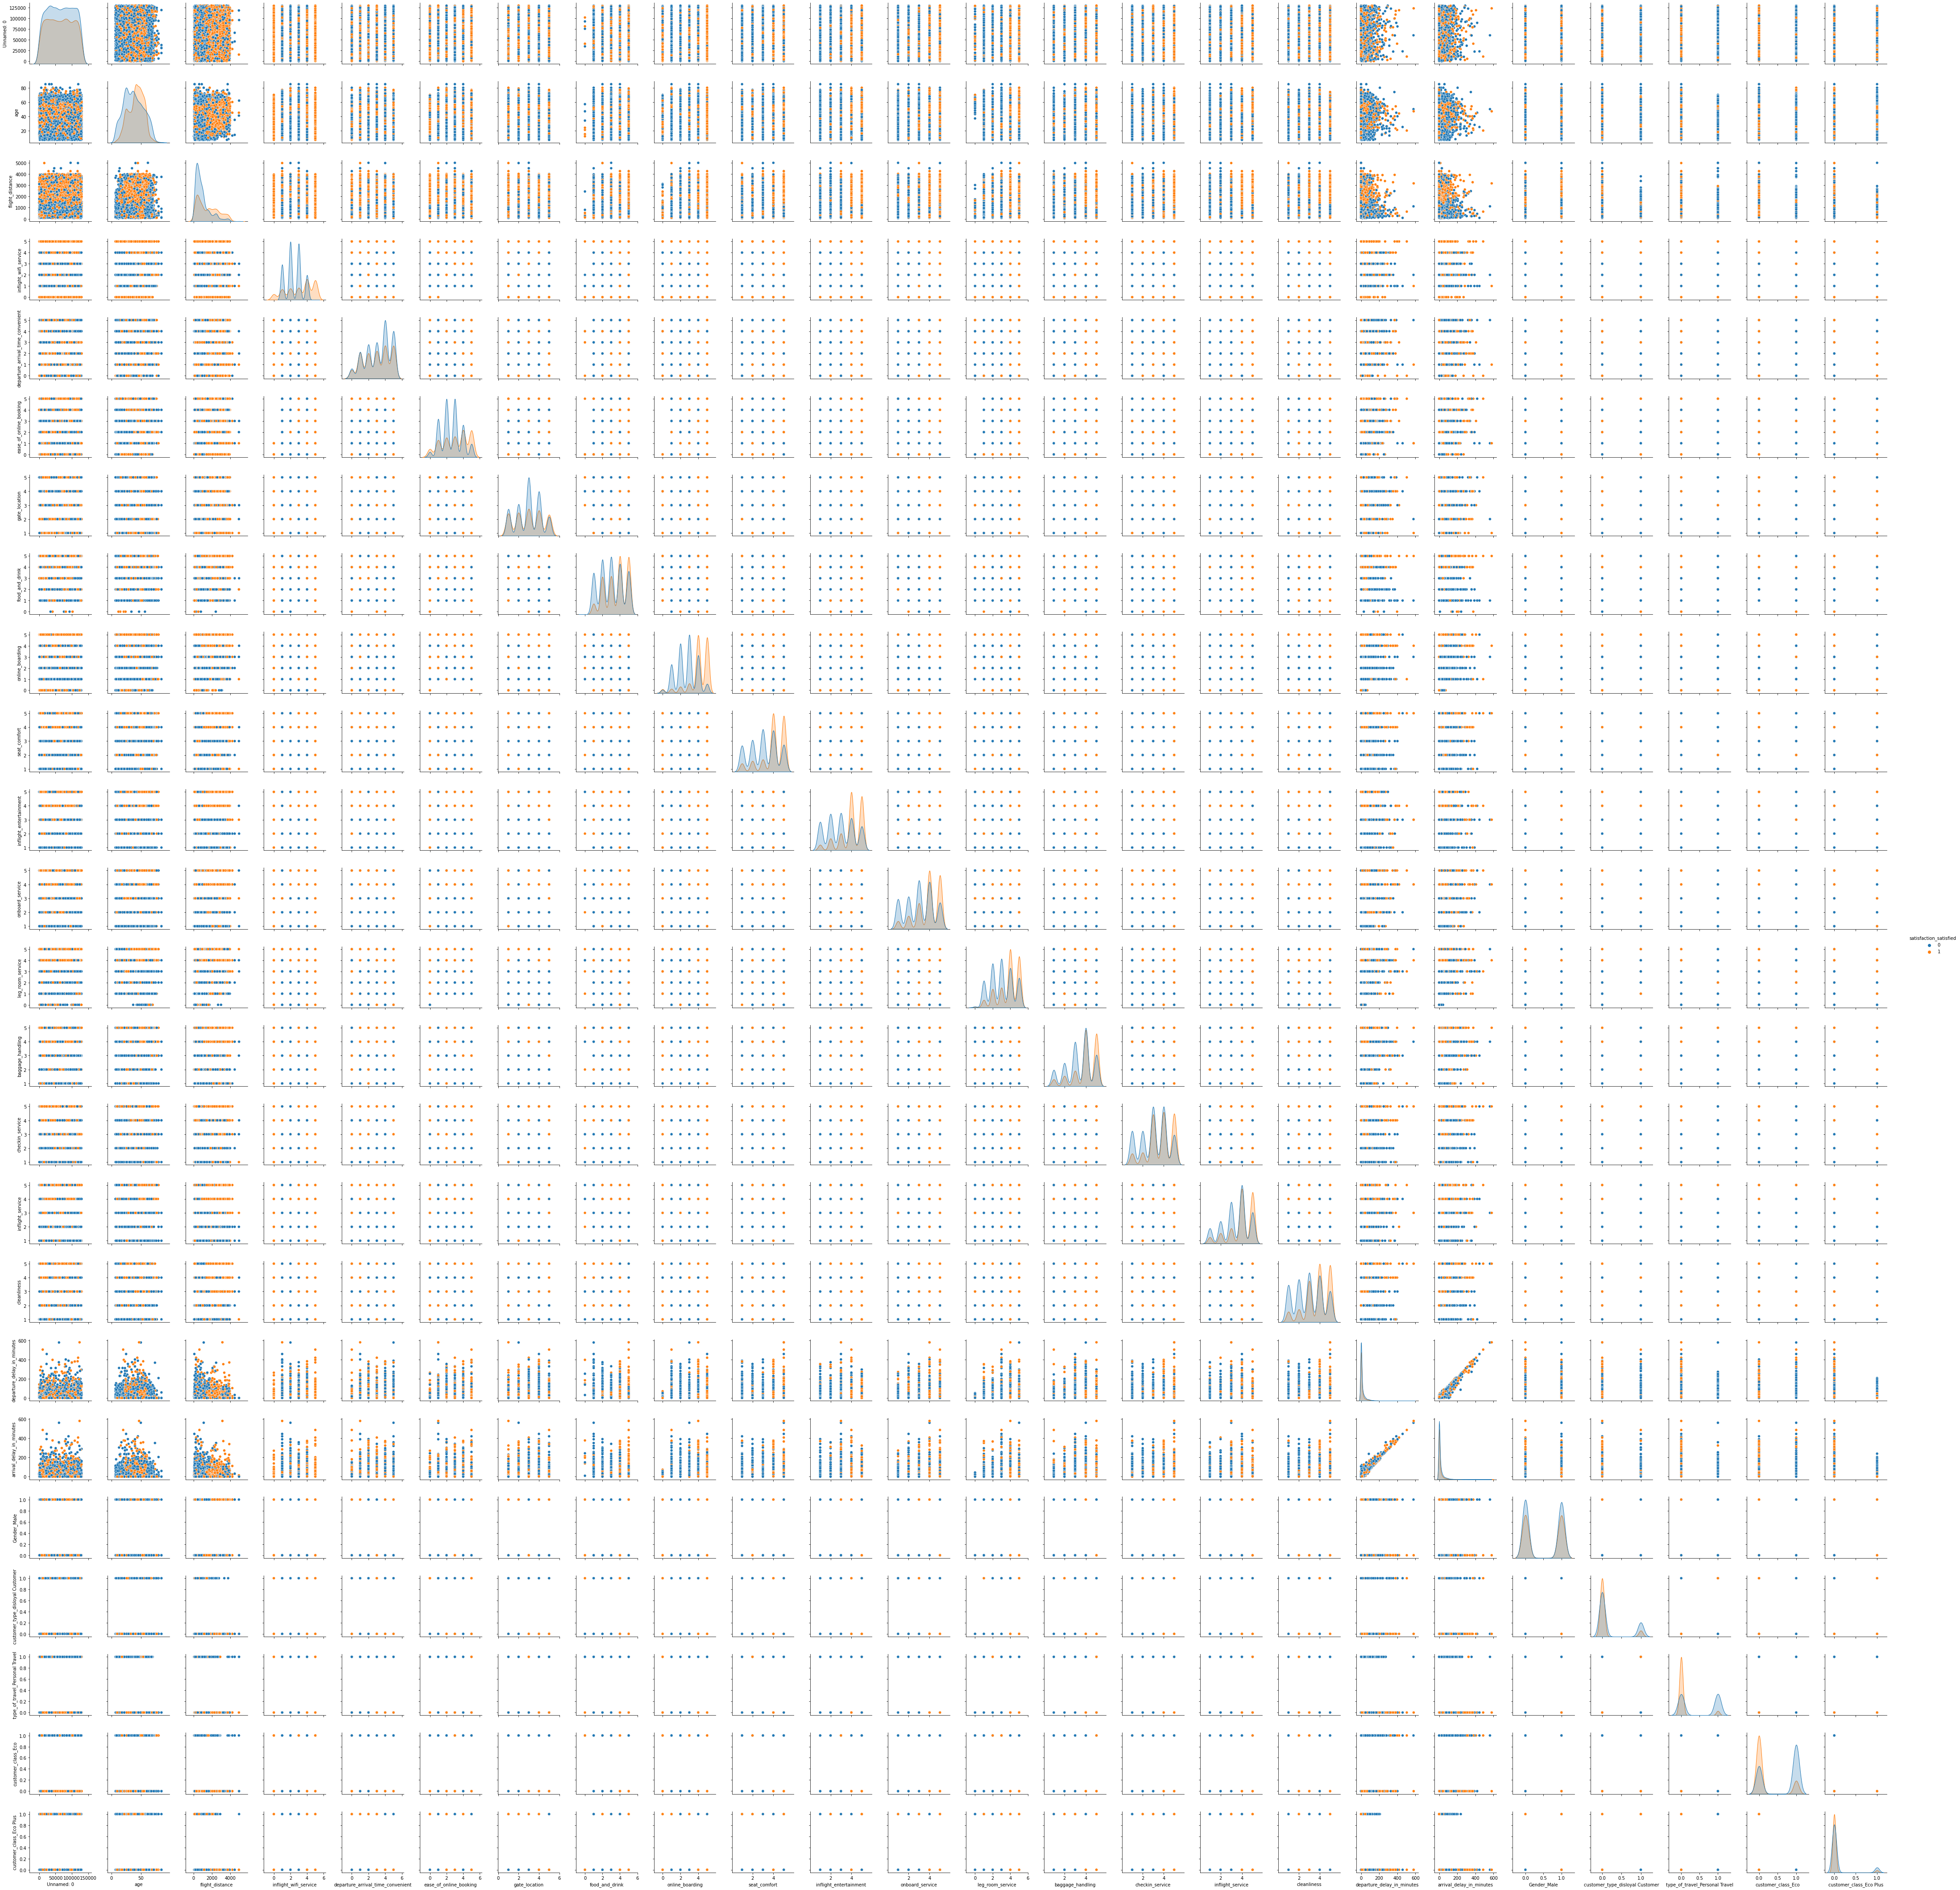

In [17]:
sns.pairplot(data.sample(10000), hue='satisfaction_satisfied')

From corelation we can see that there are quite a few features on the diagonal (they can be seen better when you click to zoom in) where the red and blue distributions (for different labels) are not overlapping. This is good because these features may have some power to predict our target. We will focus on some of these features:

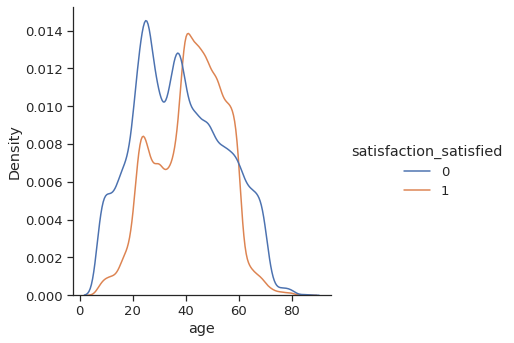

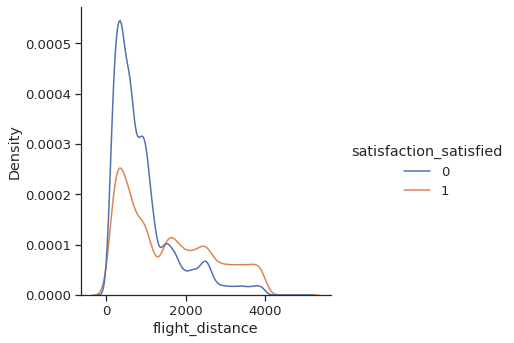

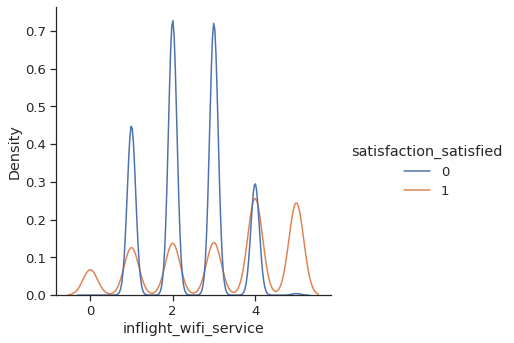

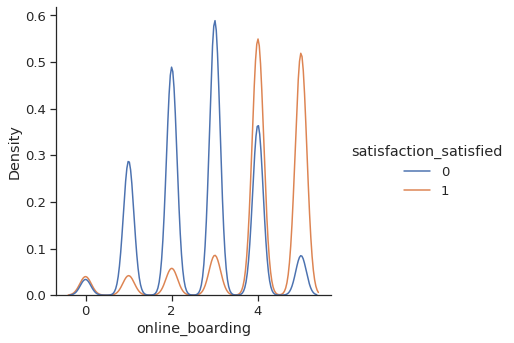

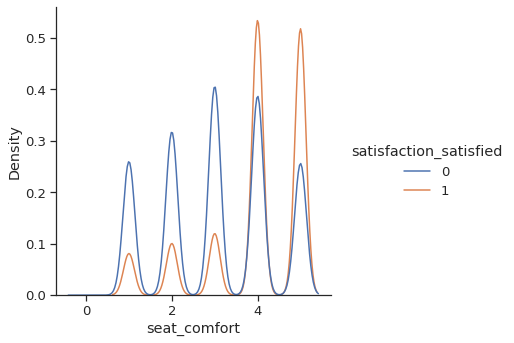

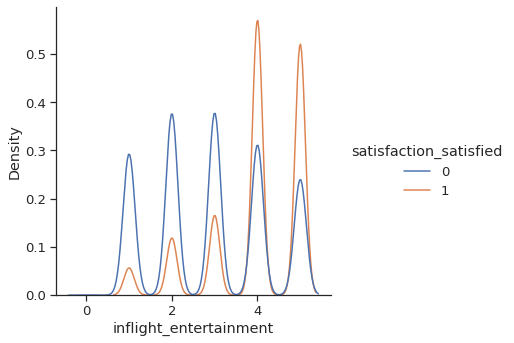

In [18]:
# Focusing on interesting features
focus_features = ['age', 'flight_distance', 'inflight_wifi_service', 'online_boarding', 'seat_comfort', 'inflight_entertainment']


sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(focus_features):
    sns.displot(data=data, x=feature, kind='kde', hue='satisfaction_satisfied')  
    
sns.despine()


**Missing Data**

Now, we will look if there is missing data


In [19]:

print (data.isnull().sum())

Unnamed: 0                             0
age                                    0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
Gender_Male                            0
customer_type_disloyal Customer        0
type_of_travel_Personal Travel         0
customer_class_Eco                     0
customer_class_Eco Plus                0
satisfaction_sat



Only  column 'arrival delay' has some missing values, and the number is not large. We can just remove this variable, but it is probably better to impute them. For this we first want to check how much the arrival delay and departure delay are correlated:


Correlation between departure and arrival delays:  0.9652911835467097


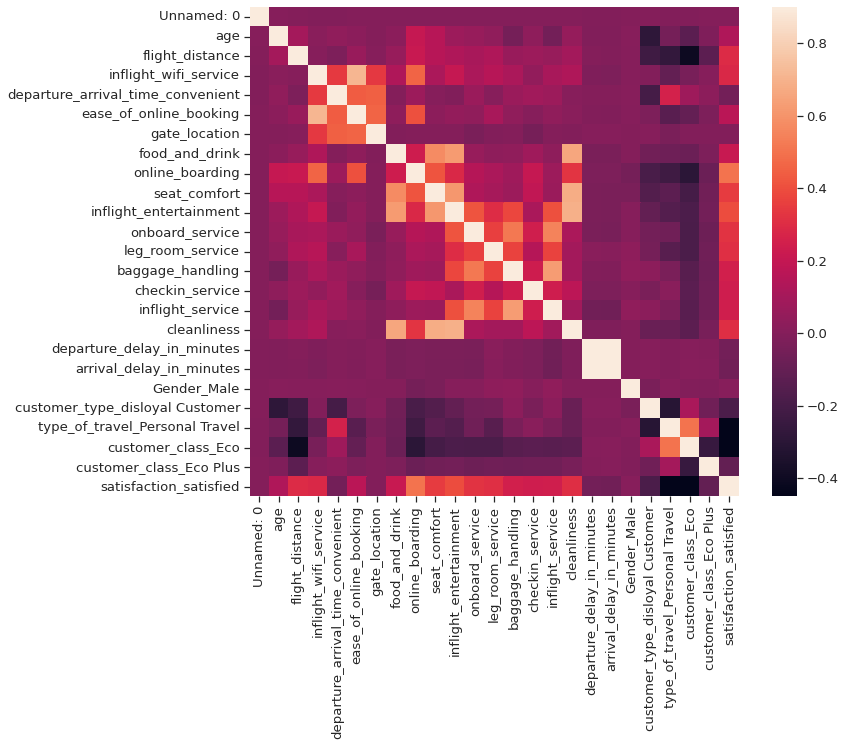

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

corrmat = data.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)
print ('Correlation between departure and arrival delays: ', corrmat['arrival_delay_in_minutes']['departure_delay_in_minutes'])

From this we can see that the two delays are highly correlated (see the two white cells off the diagonal), and the correlation value is 0.965. We can use the departure delay data to impute the missing arrival delay data.


In [21]:
# imputation
data['arrival_delay_in_minutes'].fillna(data['departure_delay_in_minutes'], inplace = True)
print (data.isnull().sum())

Unnamed: 0                           0
age                                  0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
Gender_Male                          0
customer_type_disloyal Customer      0
type_of_travel_Personal Travel       0
customer_class_Eco                   0
customer_class_Eco Plus              0
satisfaction_satisfied               0
dtype: int64



**Cheching for outliers**

Most of variables have a relatively narrow range of possibilities (such as the values from 0 to 5). Only, the flight distance and departure and arrival delays stand out. We will examine this further:


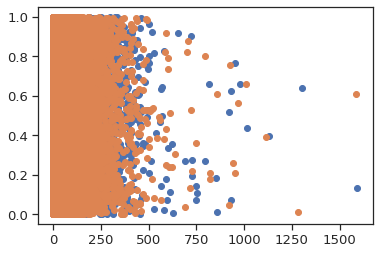

In [22]:
plt.scatter (data['departure_delay_in_minutes'], np.random.rand(data.shape[0]))
plt.scatter (data['arrival_delay_in_minutes'], np.random.rand(data.shape[0]))



It looks like only few instances have a delay (in either arrival or departure) of > 500 minutes. Let's test this:


In [23]:
print ((data['arrival_delay_in_minutes']> 500).sum())
print ((data['departure_delay_in_minutes']> 500).sum())
print (((data['departure_delay_in_minutes']> 500) + (data['arrival_delay_in_minutes']> 500)).sum())

42
43
46


/usr/local/lib/python3.7/dist-packages/pandas/core/computation/expressions.py:204: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  f"evaluating in Python space because the {repr(op_str)} "


By dropping 46 instances we will get rid of all delays larger than 500 minutes.

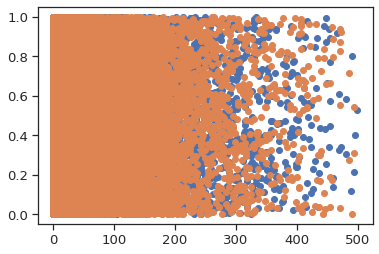

In [24]:
data = data[(data['arrival_delay_in_minutes'] <= 500)]
data = data[(data['departure_delay_in_minutes'] <= 500)]
plt.scatter (data['departure_delay_in_minutes'], np.random.rand(data.shape[0]))
plt.scatter (data['arrival_delay_in_minutes'], np.random.rand(data.shape[0]))

Now - the flight distances.

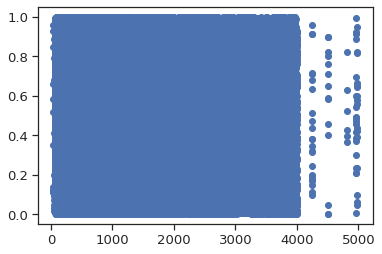

In [25]:
plt.scatter (data['flight_distance'], np.random.rand(data.shape[0]))

Here we won't get much if we remove the long distances since up to around 4000 miles the data is dense. So we will leave it like this. 


**Preparing data for models**

We have the data cleaned and numerical, so we will separate features from targets, and split it between training and test sets. We will also remove the redundant index column (unnamed), leaving 23 features to model on. In the end, we will normalize the data so that values are between 0 and 1.


In [26]:
# Preparing for modeling
from sklearn.model_selection import train_test_split

used_data = data.drop (['Unnamed: 0', 'satisfaction_satisfied'], axis=1)
x = used_data.values 
y = data['satisfaction_satisfied'].values

# Normalizing features
for feature in range (x.shape[1]):
    min = x[:,feature].min()
    max = x[:,feature].max()
    x[:,feature] = (x[:,feature]-min) / (max-min)

# Spliting to training and test set
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state=42)
print("The training data size is : {} ".format(x_train.shape))
print("The test data size is : {} ".format(x_test.shape))



The training data size is : (103867, 23) 
The test data size is : (25967, 23) 


We are now ready to begin modeling.

In [33]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, x_train, y_train, x_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(x_train,y_train.ravel(), verbose=0)
    else:
        model.fit(x_train,y_train.ravel())
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, x_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, x_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

**Random Forest model**

Accuracy = 0.9596025724958601
ROC Area under Curve = 0.9574670995800162
Time taken = 12.45252776145935
              precision    recall  f1-score   support

           0    0.95321   0.97561   0.96428     14512
           1    0.96815   0.93933   0.95352     11455

    accuracy                        0.95960     25967
   macro avg    0.96068   0.95747   0.95890     25967
weighted avg    0.95980   0.95960   0.95953     25967



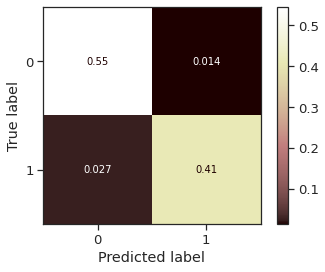

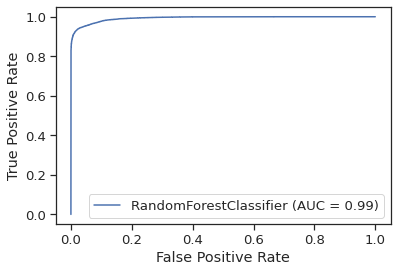

In [38]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, x_train, y_train, x_test, y_test)

Accuracy = 0.8756883737050872
ROC Area under Curve = 0.8713115460189601
Time taken = 1.5169739723205566
              precision    recall  f1-score   support

           0    0.87404   0.90849   0.89093     14512
           1    0.87797   0.83413   0.85549     11455

    accuracy                        0.87569     25967
   macro avg    0.87601   0.87131   0.87321     25967
weighted avg    0.87578   0.87569   0.87530     25967



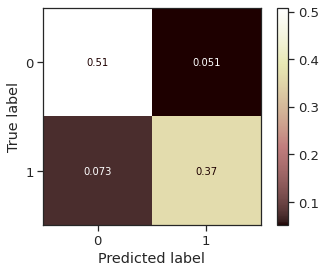

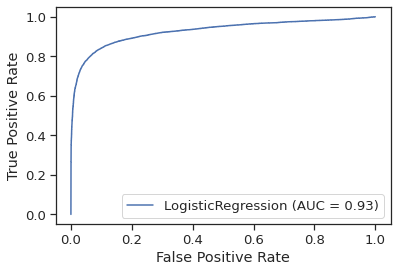

In [35]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=1000)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, x_train, y_train, x_test, y_test)


**Naive Bayes**

Accuracy = 0.8609003735510455
ROC Area under Curve = 0.8558375807351234
Time taken = 0.09883618354797363
              precision    recall  f1-score   support

           0    0.85884   0.89884   0.87838     14512
           1    0.86381   0.81283   0.83755     11455

    accuracy                        0.86090     25967
   macro avg    0.86132   0.85584   0.85796     25967
weighted avg    0.86103   0.86090   0.86037     25967



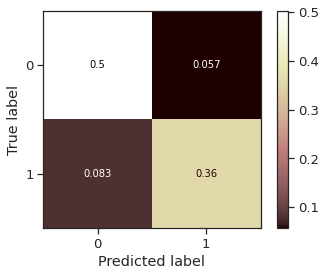

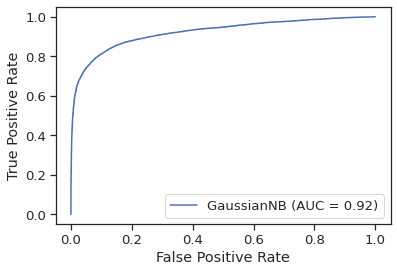

In [36]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, x_train, y_train, x_test, y_test)

**K-Nearest Neighbor** 

Accuracy = 0.9259059575615204
ROC Area under Curve = 0.9192465862776398
Time taken = 50.563310384750366
              precision    recall  f1-score   support

           0    0.90003   0.97581   0.93639     14512
           1    0.96570   0.86268   0.91129     11455

    accuracy                        0.92591     25967
   macro avg    0.93286   0.91925   0.92384     25967
weighted avg    0.92900   0.92591   0.92532     25967



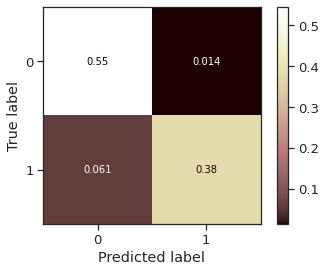

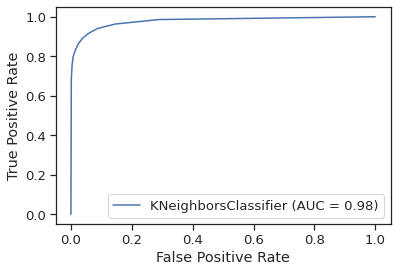

In [37]:
from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, x_train, y_train, x_test, y_test)

**Extreme Gradient Boosting**

Accuracy = 0.9625293641930142
ROC Area under Curve = 0.9606005319218052
Time taken = 253.68356728553772
              precision    recall  f1-score   support

           0    0.95687   0.97698   0.96682     14512
           1    0.97004   0.94422   0.95696     11455

    accuracy                        0.96253     25967
   macro avg    0.96346   0.96060   0.96189     25967
weighted avg    0.96268   0.96253   0.96247     25967



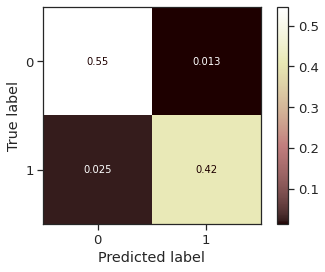

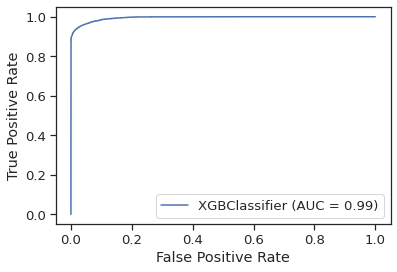

In [39]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, x_train, y_train, x_test, y_test)

**Model Comparison:**

We will compare the performace of various models by their respective ROC_AUC score and total time taken for execution.

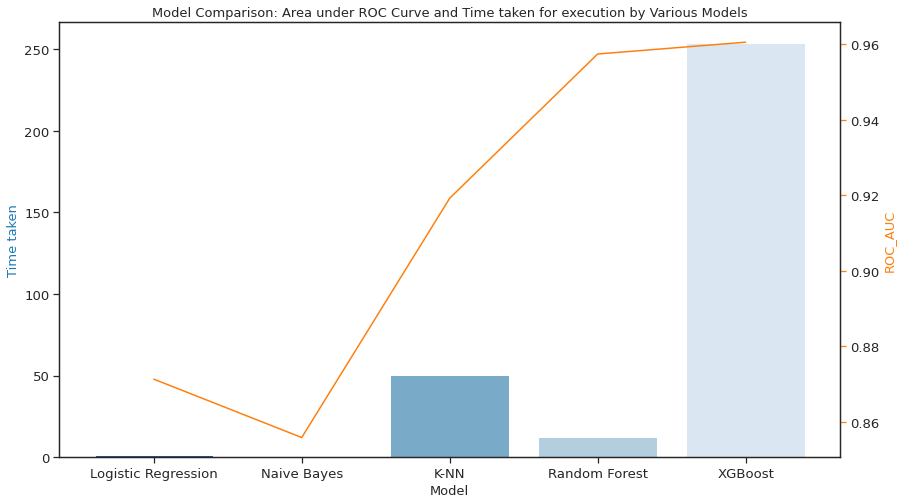

In [40]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_rf, roc_auc_xgb]
tt = [tt_lr, tt_nb, tt_kn, tt_rf, tt_xgb]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Random Forest','XGBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)


**Conclusion**

We can observe, Random Forest and XGBoost have performed almost equally well on producing high ROC_AUC score (around 96%). But Random Forest has taken several time lesser amount of time compared to time taken by XGBoost. So our conclusion is that Random Forest is the best model.